# Plotting Words Frequency with matplotlib

In this notebook, it will go over how to acquire a corpus from gutenberg. Afterwards using nltk analyze the text for word frequency and from there using some graphs find interesting information on word distribution.


## Libraries and Resources used

-  Python 3
-  nltk
-  urllib3
-  matplotlib

## Note:

For installation of the nessesary resources and libraries refer to their respective home page for installation steps for your operation system.


Written in October 2017

### Importing all the required Libraries

In [1]:
import urllib3
import nltk
import matplotlib.pyplot as plt
import os

# make sure that graphs are embedded into our notebook output
%matplotlib inline

### Loading a text from gutenburg and saving it in a txt file

In this example we will be looking at the text of Moby Dick by Herman Melville

In [2]:
# Using urllib.request we can fetch the text
webUrl = "http://www.gutenberg.org/cache/epub/2147/pg2147.txt"

# Save the text from the webpage into a variable
http_pool = urllib3.connection_from_url(webUrl)
storyString = http_pool.urlopen('GET',webUrl)

# Save the data into a text file
with open("MobyDick.txt", "w") as f:
    # Write all the content into the file
    f.write(storyString.data.decode('utf-8'))

### Using nltk to get word frequency

Although it wasn't vital that we saved the URL content into another text file (since the original URL links to a text file). It allows you to apply other code/programs to the text file for cleaning. In this example however we will also be removing stopwords from the text as well.

In [3]:
# Read the text file
with open("MobyDick.txt", "r") as f:
    mobyDickTextFull = f.read()
 
    
# Lowercase all the words (to ensure "Sure" and "sure" are matched together)
# Also word_tokenize splits each element in individual tokens
mobyDickText = nltk.word_tokenize(mobyDickTextFull.lower())

# Remove any words that isn't a word
mobyDickText = [word for word in mobyDickText if word[0].isalpha()]

# Get all the stopwords and remove them from the text
stopwords = nltk.corpus.stopwords.words("english")
mobyDickText = [word for word in mobyDickText if word not in stopwords]

# Using nltk find all the frequencies
mobyDickTextFrequency = nltk.FreqDist(mobyDickText)

# See the top 20 most common words
print(mobyDickTextFrequency.most_common(20))

[('upon', 393), ('one', 300), ('would', 236), ('could', 233), ('us', 158), ('found', 156), ('much', 130), ('great', 129), ('time', 127), ('first', 126), ('may', 124), ('two', 118), ('say', 117), ('without', 112), ('however', 111), ('thus', 110), ('made', 108), ('must', 108), ('little', 106), ('well', 106)]


### Graphing the frequency for a better picture

Although we do have the all the frequencies in a list. It is easier to find patterns or points of interest if we can visualize the data in a different way than just listing them.

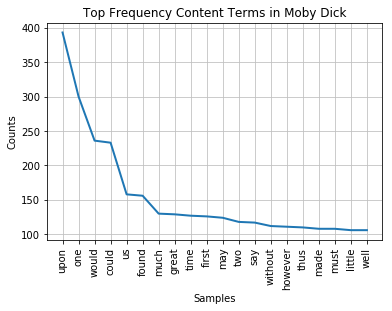

In [4]:
mobyDickTextFrequency.plot(20, title="Top Frequency Content Terms in Moby Dick")

Looking at the graph above there is very little of amount of words that can be used as names. However the words "us" is centered between "one" and "two". There could be a reason for that.

### Looking at concordance for more information

Lets have a closer look at the concordance of the three words to see if there is a relationship.



In [5]:
# Tokenize the text
mobyDickText = nltk.Text(nltk.word_tokenize(mobyDickTextFull))

# Get the concordance for the 3 words
mobyDickText.concordance("one", lines=5)
mobyDickText.concordance("two", lines=5)
mobyDickText.concordance("us", lines=5)

Displaying 5 of 300 matches:
Willis The Unparalleled Adventures of One Hans Pfall The Gold Bug Four Beasts i
ans Pfall The Gold Bug Four Beasts in One The Murders in the Rue Morgue The Mys
st and followed faster till his songs one burden bore -- Till the dirges of his
ttage at Fordham , N. Y. : '' Here is one of the finest scholars , one of the m
 Here is one of the finest scholars , one of the most original men of genius , 
Displaying 5 of 118 matches:
xistence . When Edgar , at the age of two years , was orphaned , the family was
 best-known tales , was $ 10 a week ! Two years later his salary was but $ 600 
ad agreed to pay him $ 20 monthly for two pages of criticism . Those were disco
ar when youth and beauty die . In the two and a half score years that have elap
t of their idiosyncrasy . Mr. Poe has two of the prime qualities of genius , a 
Displaying 5 of 158 matches:
e articulate rumor barely has reached us dwellers by the Atlantic . Perhaps th
ency of the young poet that impres

Depending on what you are looking for this concordance may provide useful information to undercover. However we can also use other graphical techniques to get a better picture.

### Graphhing Dispersion

We can graph all three words into a dispersion chart to see if they appear near eachother.

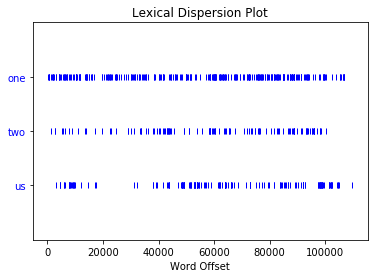

In [6]:
mobyDickText.dispersion_plot(["one", "two", "us"])

### Conclusion

Although there may not be any importance between the three words graphing the data result helped explore the possible relationship between words or terms that might not be noticable without graphing the data.


This notebook was created in part from resources found at :
https://github.com/sgsinclair/alta/blob/6dd71da5377217cdee85efba384c8bf66936ab82/ipynb/GettingGraphical.ipynb